Note: you may need to restart the kernel to use updated packages.


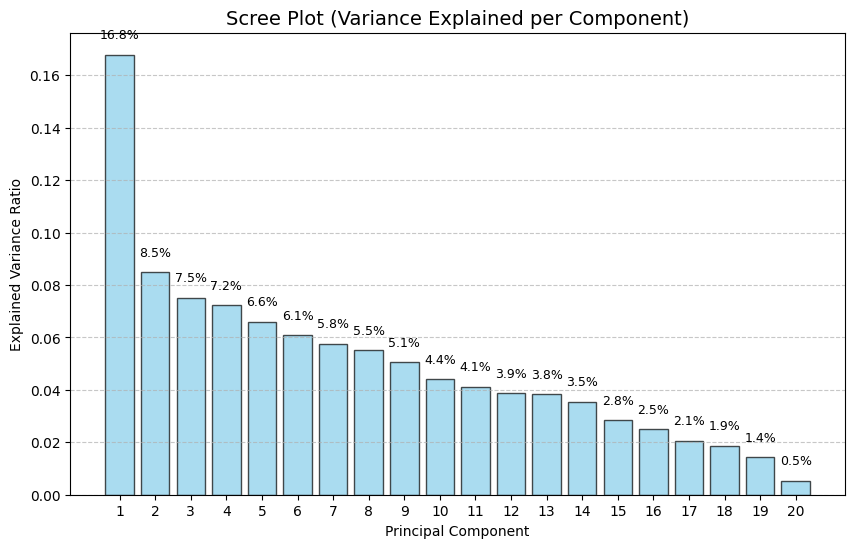

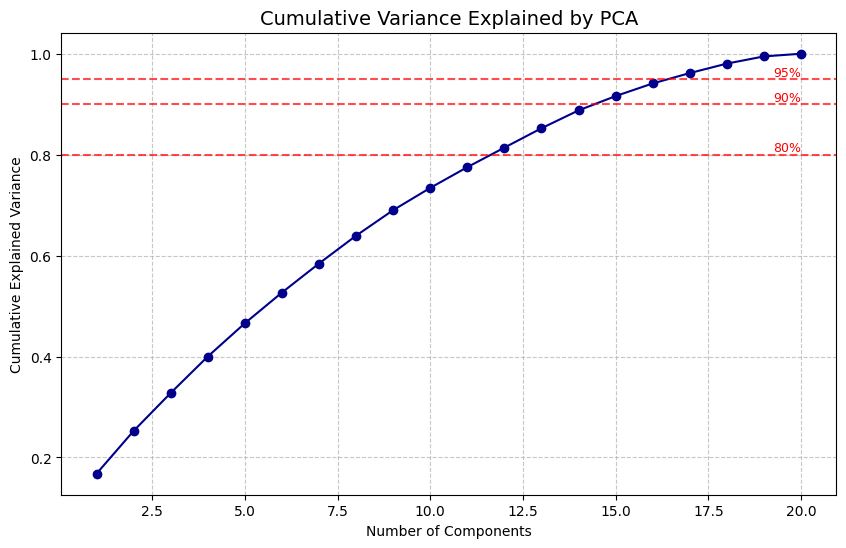

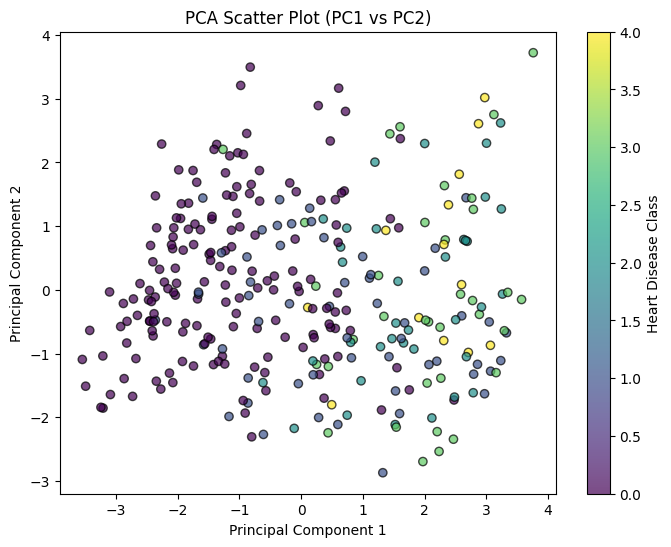

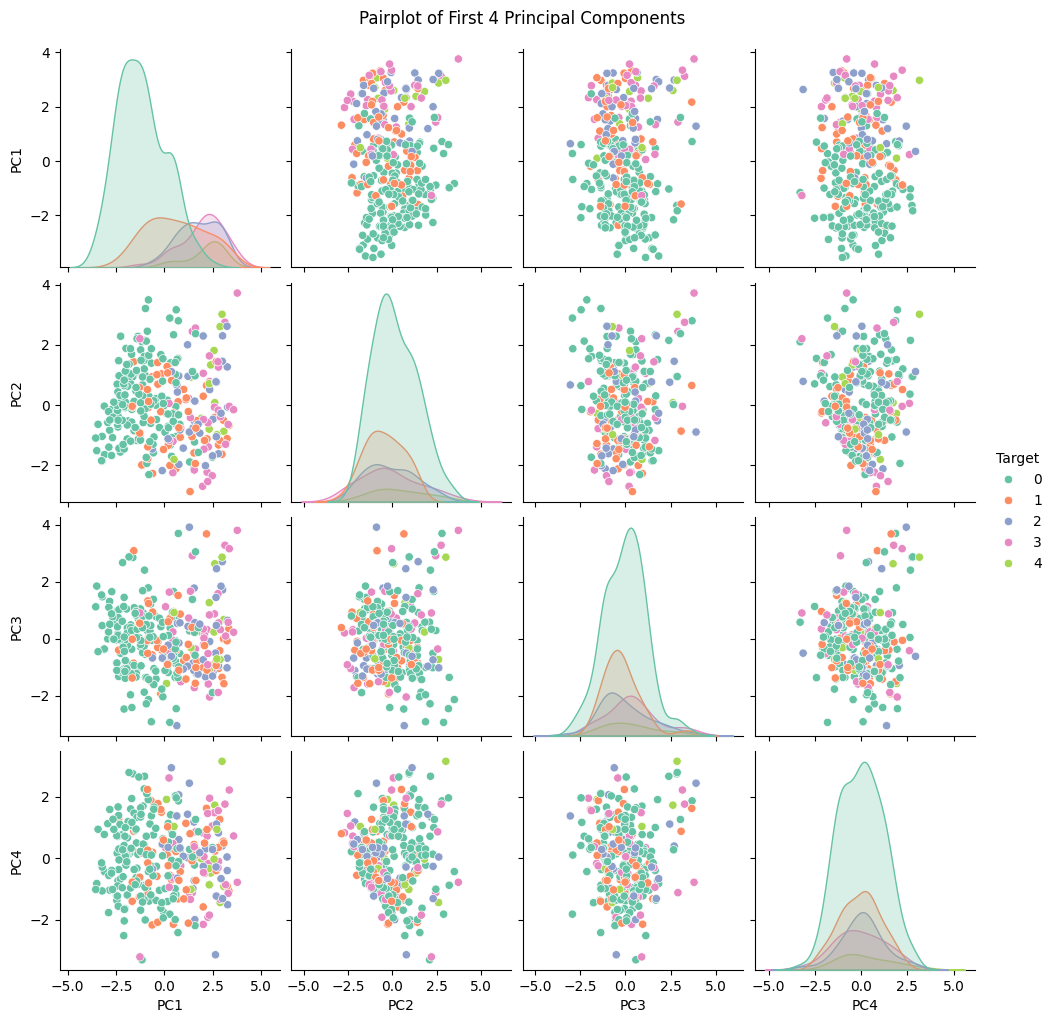

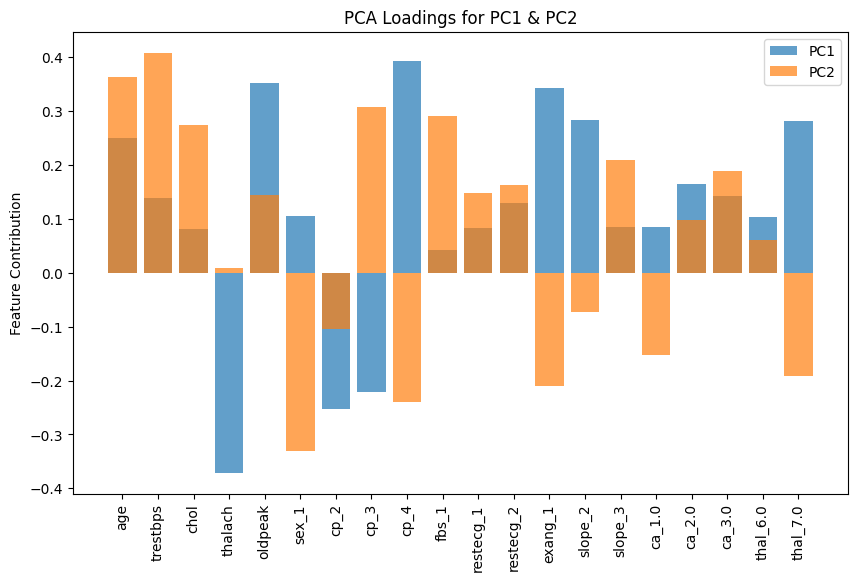

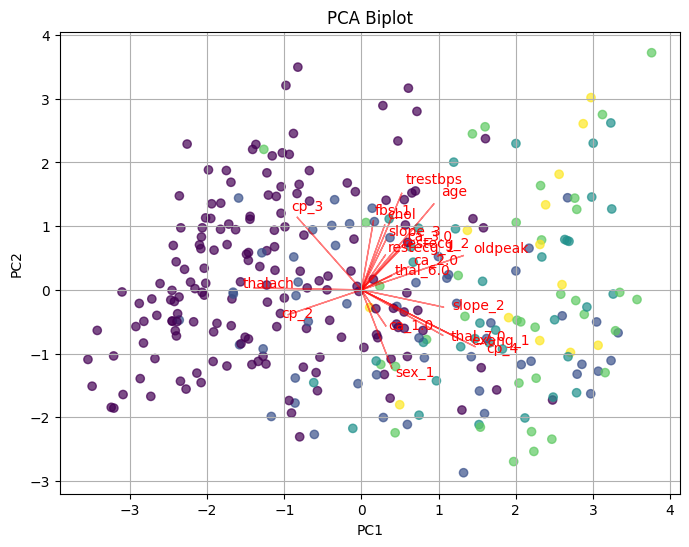

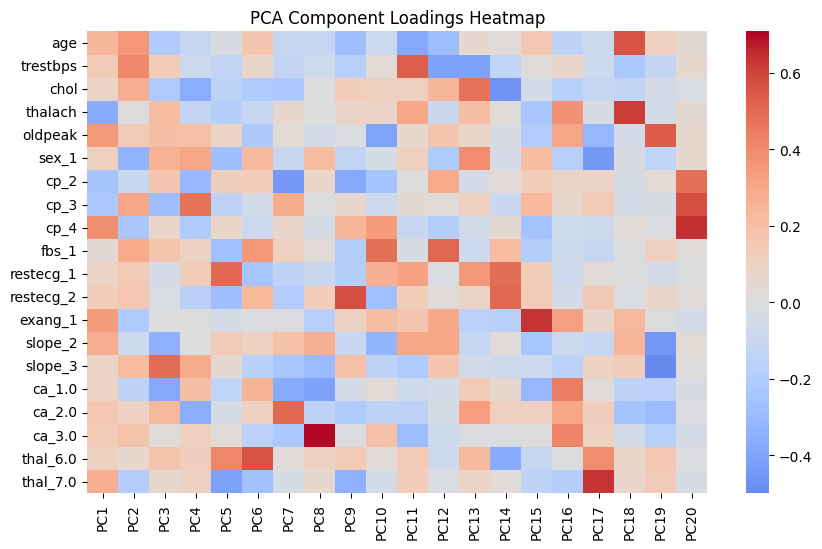

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.719100  2.802161  3.693806  1.862074  0.919712  2.997611 -0.980508   
1  3.244870  1.270128 -0.682810 -0.403882  0.187487 -0.117400 -1.413876   
2  3.327634 -0.675133  0.350386 -1.067139 -0.498398  0.049601  1.571885   
3 -1.631757  0.944251  2.849947  2.741963  0.070079 -2.034929  0.120380   
4 -2.472543 -0.158501  0.971312 -1.226375  0.684162 -0.141493 -0.922994   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.650797  1.182311 -0.126588 -0.273271  0.563418  0.464176 -0.756906   
1  2.892094  0.533003  0.472374 -0.588839 -0.793915 -1.048924 -0.437415   
2 -0.165452 -0.417926 -1.357637 -0.632516  0.057781  0.827434  0.856128   
3 -1.052685  1.223275 -1.261278  0.240486  0.759501  0.595350 -1.118817   
4  0.190253  0.484273 -1.095664  0.462482  0.715708 -0.907969  1.042404   

       PC15      PC16      PC17      PC18      PC19      PC20  
0 -0.904613 -1.122291  0.479421  0

In [21]:
%pip install matplotlib scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Load dataset
df = pd.read_csv('heart_disease_processed - PCA.csv')

# Separate features and target
y = df["num"]  # target
X = df.drop(columns=["num"])  # features

# Step 1: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 3: Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

import numpy as np

# Step 4a: ScreeN plot
plt.figure(figsize=(10,6))
bars = plt.bar(range(1, len(explained_variance)+1), explained_variance, 
               alpha=0.7, align="center", color="skyblue", edgecolor="k")

# Add % labels on top of bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, 
             bar.get_height() + 0.005, 
             f"{explained_variance[i]*100:.1f}%", 
             ha='center', va='bottom', fontsize=9)

plt.ylabel("Explained Variance Ratio")
plt.xlabel("Principal Component")
plt.title("Scree Plot (Variance Explained per Component)", fontsize=14)
plt.xticks(range(1, len(explained_variance)+1))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


# Step 4b: Cumulative variance plot
plt.figure(figsize=(10,6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, 
         marker="o", linestyle="-", color="darkblue")

# Add horizontal reference lines
for threshold in [0.8, 0.9, 0.95]:
    plt.axhline(y=threshold, color="r", linestyle="--", alpha=0.7)
    plt.text(len(cumulative_variance), threshold, f"{int(threshold*100)}%", 
             color="r", va="bottom", ha="right", fontsize=9)

plt.ylabel("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.title("Cumulative Variance Explained by PCA", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


# Step 4c: Scatter plot of first 2 components
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="viridis", edgecolor="k", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Scatter Plot (PC1 vs PC2)")
plt.colorbar(label="Heart Disease Class")
plt.show()

import seaborn as sns

# Create a DataFrame with first few PCs + target
pca_df = pd.DataFrame(X_pca[:, :4], columns=["PC1", "PC2", "PC3", "PC4"])
pca_df["Target"] = y.values

# Pairplot
sns.pairplot(pca_df, hue="Target", diag_kind="kde", palette="Set2")
plt.suptitle("Pairplot of First 4 Principal Components", y=1.02)
plt.show()

import numpy as np

# Get loadings (contribution of features to PCs)
loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f"PC{i+1}" for i in range(pca.n_components_)],
                        index=X.columns)

# Plot loadings for PC1 & PC2
plt.figure(figsize=(10,6))
plt.bar(loadings.index, loadings["PC1"], alpha=0.7, label="PC1")
plt.bar(loadings.index, loadings["PC2"], alpha=0.7, label="PC2")
plt.xticks(rotation=90)
plt.ylabel("Feature Contribution")
plt.title("PCA Loadings for PC1 & PC2")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))

# Scatter plot of samples
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="viridis", alpha=0.7)

# Add feature vectors
for i, feature in enumerate(X.columns):
    plt.arrow(0, 0, 
              pca.components_[0, i]*max(X_pca[:,0]), 
              pca.components_[1, i]*max(X_pca[:,1]), 
              color='r', alpha=0.5)
    plt.text(pca.components_[0, i]*max(X_pca[:,0])*1.1, 
             pca.components_[1, i]*max(X_pca[:,1])*1.1, 
             feature, color='r')

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Biplot")
plt.grid(True)
plt.show()


plt.figure(figsize=(10,6))
sns.heatmap(loadings, cmap="coolwarm", center=0, annot=False)
plt.title("PCA Component Loadings Heatmap")
plt.show()

# -----------------
# Deliverables
# -----------------
# 1. PCA-transformed dataset
X_pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
print(X_pca_df.head())

# 2. Variance retained
print("\nExplained variance ratio per component:\n", explained_variance)
print("\nCumulative variance:\n", cumulative_variance)

In [22]:
%pip install matplotlib scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np


Note: you may need to restart the kernel to use updated packages.


In [23]:
# Load dataset
df = pd.read_csv('heart_disease_processed - PCA.csv')

In [24]:
# Separate features and target
y = df["num"]  # target
X = df.drop(columns=["num"])  # features

In [25]:
# Step 1: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
# Step 2: Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

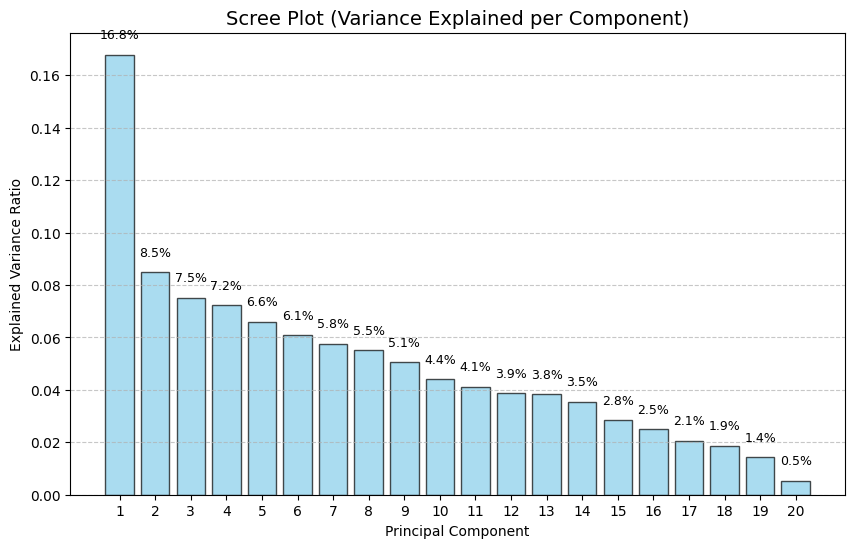

In [27]:
# Step 4a: Screen plot
plt.figure(figsize=(10,6))
bars = plt.bar(range(1, len(explained_variance)+1), explained_variance, 
               alpha=0.7, align="center", color="skyblue", edgecolor="k")

# Add % labels on top of bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, 
             bar.get_height() + 0.005, 
             f"{explained_variance[i]*100:.1f}%", 
             ha='center', va='bottom', fontsize=9)

plt.ylabel("Explained Variance Ratio")
plt.xlabel("Principal Component")
plt.title("Scree Plot (Variance Explained per Component)", fontsize=14)
plt.xticks(range(1, len(explained_variance)+1))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

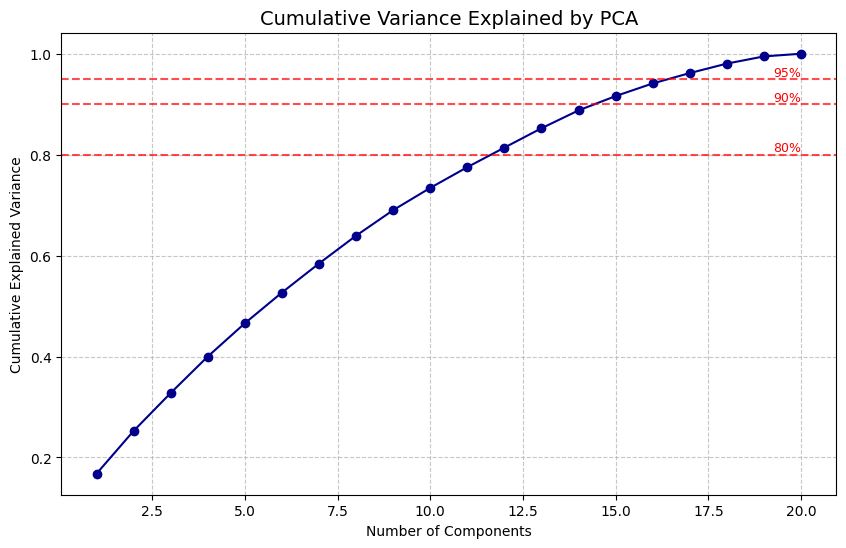

In [28]:
# Step 4b: Cumulative variance plot
plt.figure(figsize=(10,6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, 
         marker="o", linestyle="-", color="darkblue")

# Add horizontal reference lines
for threshold in [0.8, 0.9, 0.95]:
    plt.axhline(y=threshold, color="r", linestyle="--", alpha=0.7)
    plt.text(len(cumulative_variance), threshold, f"{int(threshold*100)}%", 
             color="r", va="bottom", ha="right", fontsize=9)

plt.ylabel("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.title("Cumulative Variance Explained by PCA", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

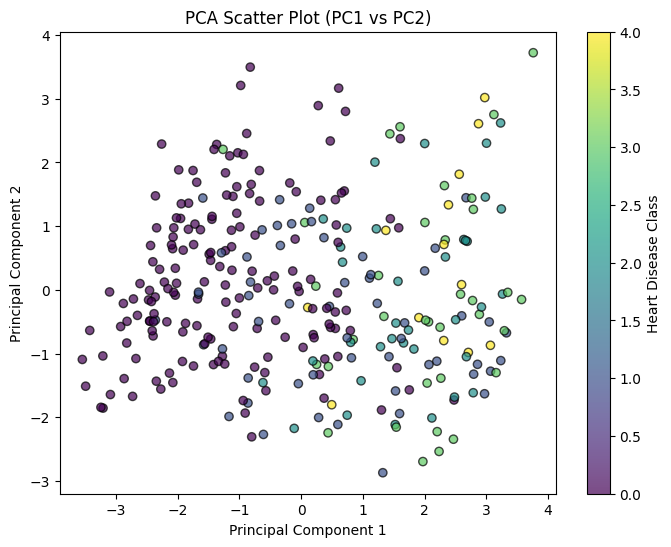

In [29]:
# Step 4c: Scatter plot of first 2 components
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="viridis", edgecolor="k", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Scatter Plot (PC1 vs PC2)")
plt.colorbar(label="Heart Disease Class")
plt.show()

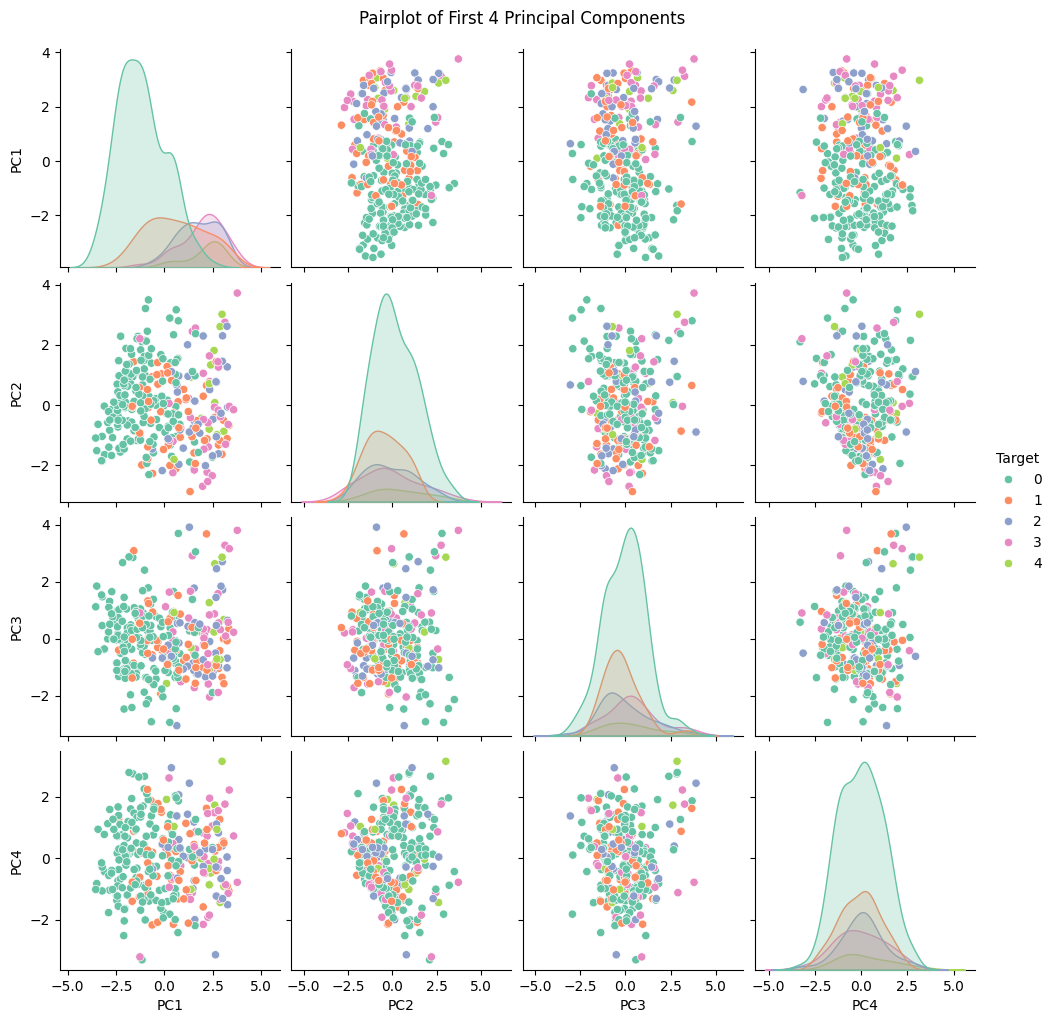

In [30]:
# Create a DataFrame with first few PCs + target
pca_df = pd.DataFrame(X_pca[:, :4], columns=["PC1", "PC2", "PC3", "PC4"])
pca_df["Target"] = y.values

# Pairplot
sns.pairplot(pca_df, hue="Target", diag_kind="kde", palette="Set2")
plt.suptitle("Pairplot of First 4 Principal Components", y=1.02)
plt.show()

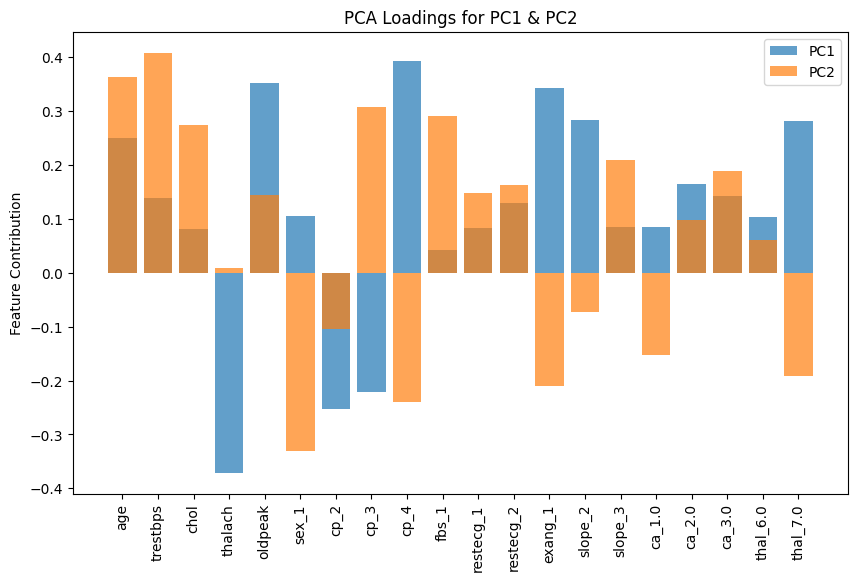

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [31]:
# Get loadings (contribution of features to PCs)
loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f"PC{i+1}" for i in range(pca.n_components_)],
                        index=X.columns)

# Plot loadings for PC1 & PC2
plt.figure(figsize=(10,6))
plt.bar(loadings.index, loadings["PC1"], alpha=0.7, label="PC1")
plt.bar(loadings.index, loadings["PC2"], alpha=0.7, label="PC2")
plt.xticks(rotation=90)
plt.ylabel("Feature Contribution")
plt.title("PCA Loadings for PC1 & PC2")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))

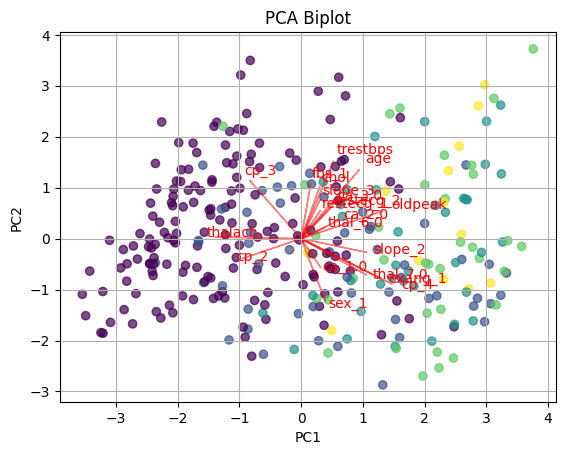

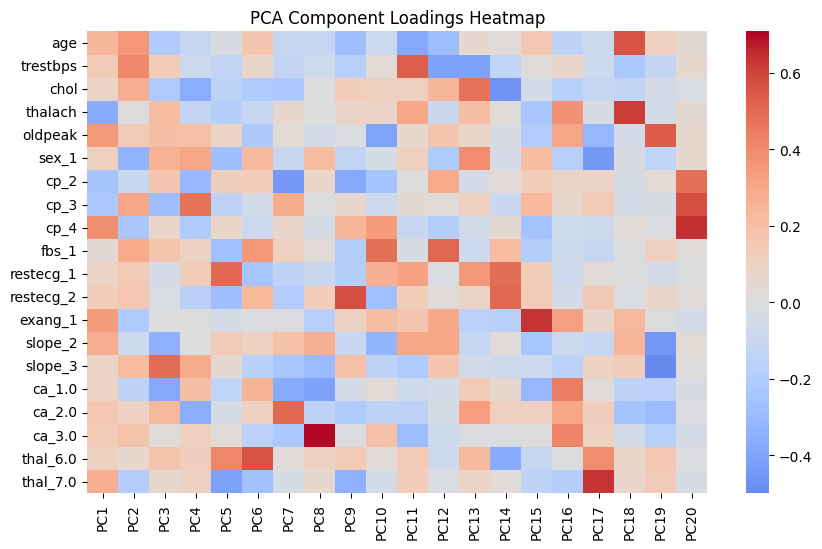

In [32]:
# Scatter plot of samples
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="viridis", alpha=0.7)

# Add feature vectors
for i, feature in enumerate(X.columns):
    plt.arrow(0, 0, 
              pca.components_[0, i]*max(X_pca[:,0]), 
              pca.components_[1, i]*max(X_pca[:,1]), 
              color='r', alpha=0.5)
    plt.text(pca.components_[0, i]*max(X_pca[:,0])*1.1, 
             pca.components_[1, i]*max(X_pca[:,1])*1.1, 
             feature, color='r')

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Biplot")
plt.grid(True)
plt.show()


plt.figure(figsize=(10,6))
sns.heatmap(loadings, cmap="coolwarm", center=0, annot=False)
plt.title("PCA Component Loadings Heatmap")
plt.show()

In [33]:
# 1. PCA-transformed dataset
X_pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
print(X_pca_df.head())
X_pca_df.to_csv("pca_transformed.csv", index=False)

# 2. Variance retained
print("\nExplained variance ratio per component:\n", explained_variance)
print("\nCumulative variance:\n", cumulative_variance)

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.719100  2.802161  3.693806  1.862074  0.919712  2.997611 -0.980508   
1  3.244870  1.270128 -0.682810 -0.403882  0.187487 -0.117400 -1.413876   
2  3.327634 -0.675133  0.350386 -1.067139 -0.498398  0.049601  1.571885   
3 -1.631757  0.944251  2.849947  2.741963  0.070079 -2.034929  0.120380   
4 -2.472543 -0.158501  0.971312 -1.226375  0.684162 -0.141493 -0.922994   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.650797  1.182311 -0.126588 -0.273271  0.563418  0.464176 -0.756906   
1  2.892094  0.533003  0.472374 -0.588839 -0.793915 -1.048924 -0.437415   
2 -0.165452 -0.417926 -1.357637 -0.632516  0.057781  0.827434  0.856128   
3 -1.052685  1.223275 -1.261278  0.240486  0.759501  0.595350 -1.118817   
4  0.190253  0.484273 -1.095664  0.462482  0.715708 -0.907969  1.042404   

       PC15      PC16      PC17      PC18      PC19      PC20  
0 -0.904613 -1.122291  0.479421  0